In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso, LassoCV, RidgeClassifier, RidgeClassifierCV
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# First, we upload the dataset

In [2]:
data_raw = pd.read_csv(r"dataset-of-90s.csv") ; data_raw.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


# Then, we drop 'track', 'artist', 'uri' features 

In [3]:
data = data_raw.drop(['track', 'artist', 'uri'], axis=1) ;data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.006990,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.000000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.495000,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.926000,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.003390,0.1530,0.961,153.166,430653,4,25.57331,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,0.396,0.795,9,-6.070,0,0.2340,0.000928,0.000209,0.1820,0.762,152.943,82107,4,30.34109,6,0
5516,0.621,0.655,9,-6.281,0,0.0309,0.050600,0.006260,0.0937,0.690,134.167,211653,4,34.89506,10,0
5517,0.562,0.314,10,-15.213,0,0.0298,0.440000,0.000011,0.1060,0.571,166.847,189827,4,21.11763,10,1
5518,0.622,0.781,7,-6.080,1,0.0368,0.000101,0.755000,0.3830,0.214,120.051,330053,4,47.13558,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5520 non-null   float64
 1   energy            5520 non-null   float64
 2   key               5520 non-null   int64  
 3   loudness          5520 non-null   float64
 4   mode              5520 non-null   int64  
 5   speechiness       5520 non-null   float64
 6   acousticness      5520 non-null   float64
 7   instrumentalness  5520 non-null   float64
 8   liveness          5520 non-null   float64
 9   valence           5520 non-null   float64
 10  tempo             5520 non-null   float64
 11  duration_ms       5520 non-null   int64  
 12  time_signature    5520 non-null   int64  
 13  chorus_hit        5520 non-null   float64
 14  sections          5520 non-null   int64  
 15  target            5520 non-null   int64  
dtypes: float64(10), int64(6)
memory usage: 690

# We change all values to float64 format

In [5]:
data = data.astype(float) ; data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5520 non-null   float64
 1   energy            5520 non-null   float64
 2   key               5520 non-null   float64
 3   loudness          5520 non-null   float64
 4   mode              5520 non-null   float64
 5   speechiness       5520 non-null   float64
 6   acousticness      5520 non-null   float64
 7   instrumentalness  5520 non-null   float64
 8   liveness          5520 non-null   float64
 9   valence           5520 non-null   float64
 10  tempo             5520 non-null   float64
 11  duration_ms       5520 non-null   float64
 12  time_signature    5520 non-null   float64
 13  chorus_hit        5520 non-null   float64
 14  sections          5520 non-null   float64
 15  target            5520 non-null   float64
dtypes: float64(16)
memory usage: 690.1 KB


# Here, we are seperating our target and predictor set

In [6]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [7]:
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,0.527,0.316,1.0,-15.769,1.0,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840.0,4.0,53.89523,6.0
1,0.738,0.541,1.0,-5.485,1.0,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573.0,4.0,32.16853,16.0
2,0.736,0.419,0.0,-10.662,1.0,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267.0,4.0,42.05369,9.0
3,0.565,0.594,5.0,-13.086,1.0,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933.0,4.0,80.99693,10.0
4,0.513,0.760,4.0,-10.077,1.0,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653.0,4.0,25.57331,20.0


In [8]:
y

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
5515    0.0
5516    0.0
5517    1.0
5518    0.0
5519    1.0
Name: target, Length: 5520, dtype: float64

# Here, we are splitting our data to train and test set to get realistic results

In [9]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 0)
# random state = 0 to get same results in every try

In [10]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)

X_train shape (4416, 15)
y_train shape (4416,)


# We perform logistic regression to our dataset

In [11]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [12]:
table = pd.DataFrame({'True':y_test, 'Predicted':y_pred}); table

,True,Predicted
5253,0.0,1.0
1902,1.0,1.0
405,1.0,1.0
5390,0.0,1.0
142,0.0,1.0
...,...,...
726,0.0,1.0
3230,0.0,1.0
3039,0.0,1.0
4858,1.0,1.0


In [20]:
score = accuracy_score(y_pred,y_test) ; score

0.4990942028985507

### We use cross-validation 

In [21]:
scores = cross_val_score(log_model,X,y,cv = 10) ; scores

array([0.5       , 0.5634058 , 0.5       , 0.59057971, 0.5       ,
       0.5       , 0.5       , 0.62862319, 0.5       , 0.5       ])

In [22]:
results = pd.DataFrame({"Accuracy Score Mean":scores.mean(),"Accuracy Score Std":scores.std()},
                       index = ["Without NA"])
results

,Accuracy Score Mean,Accuracy Score Std
Without NA,0.528261,0.045587


Without cleaning the dataset, we reached 0.4990942028985507 accuracy score

# We can show accuracy score working principle like this:

In [23]:
print("Sum of '1''s is equal to:", y_pred.sum(),"at the prediction set")
print("Sum of '1''s is equal to:", y_test.sum(),"at the test set")

Sum of '1''s is equal to: 1104.0 at the prediction set
Sum of '1''s is equal to: 551.0 at the test set


In [24]:
print(y_test.sum()/y_pred.sum())

0.4990942028985507


# Here we perform standardScale

In [25]:
scaler = preprocessing.StandardScaler()

X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)

In [28]:
X_stand = scaler.fit_transform(X)

We perform logistic regression again

In [29]:
log_model = LogisticRegression()
log_model.fit(X_train_stand, y_train)
y_pred = log_model.predict(X_test_stand)

In [30]:
score = accuracy_score(y_pred,y_test) ; score

0.7753623188405797

In [31]:
scores = cross_val_score(log_model, X_stand, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.82608696 0.79891304 0.78623188 0.80797101 0.81521739 0.82065217
 0.78623188 0.80072464 0.79710145 0.78442029]


In [32]:
results = pd.DataFrame({"Accuracy Score Mean":scores.mean(),"Accuracy Score Std":scores.std()},
                       index = ["Without NA"])
results

,Accuracy Score Mean,Accuracy Score Std
Without NA,0.802355,0.014066


# Now we will look for multi-collinearity and low correlated variables manually

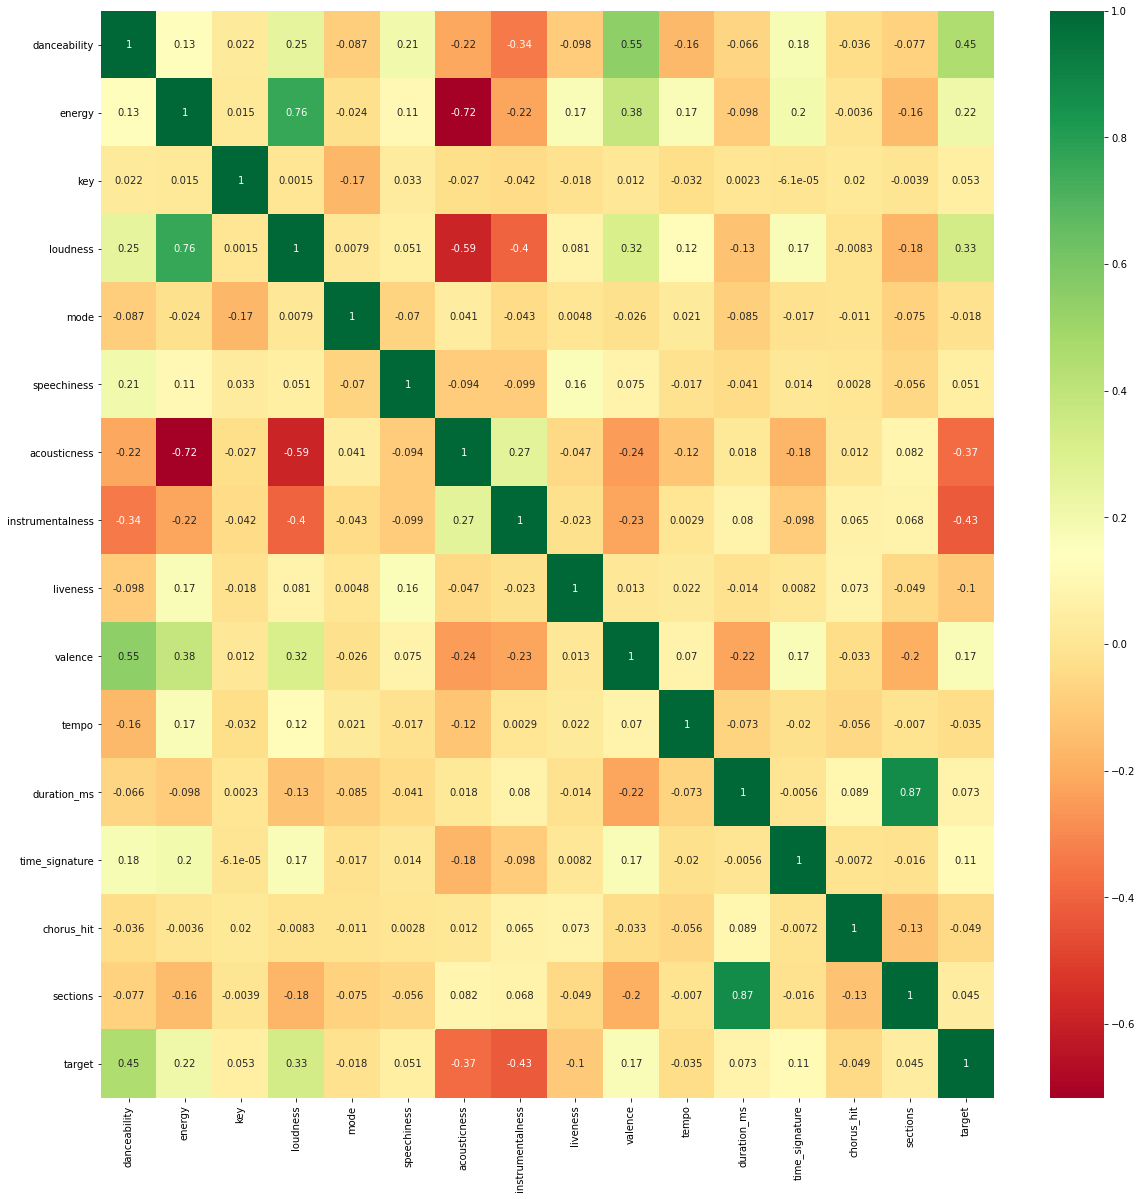

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We decide 0.2 as a threshold

In [34]:
data_selected = data[["danceability","energy","loudness","acousticness","instrumentalness","target"]] ; data_selected

,danceability,energy,loudness,acousticness,instrumentalness,target
0,0.527,0.316,-15.769,0.693000,0.006990,0.0
1,0.738,0.541,-5.485,0.559000,0.000000,1.0
2,0.736,0.419,-10.662,0.693000,0.495000,0.0
3,0.565,0.594,-13.086,0.655000,0.926000,0.0
4,0.513,0.760,-10.077,0.000017,0.003390,0.0
...,...,...,...,...,...,...
5515,0.396,0.795,-6.070,0.000928,0.000209,0.0
5516,0.621,0.655,-6.281,0.050600,0.006260,0.0
5517,0.562,0.314,-15.213,0.440000,0.000011,1.0
5518,0.622,0.781,-6.080,0.000101,0.755000,0.0


In [35]:
X_r = data_selected.iloc[:,0:-1]
y = data_selected.iloc[:,-1]

In [36]:
X_train_r, X_test_r, y_train, y_test =train_test_split(X_r, y, test_size = 0.2, random_state = 0)
# random state = 0 to get same results in every try

In [37]:
log_model = LogisticRegression()
log_model.fit(X_train_r, y_train)
y_pred = log_model.predict(X_test_r)
score = accuracy_score(y_pred, y_test);score

0.7753623188405797

In [38]:
scores = cross_val_score(log_model,X_r,y,cv = 10) ; scores

array([0.81884058, 0.79166667, 0.7807971 , 0.78442029, 0.79710145,
       0.80434783, 0.76449275, 0.79166667, 0.78985507, 0.75543478])

In [39]:
results = pd.DataFrame({"Accuracy Score Mean":scores.mean(),"Accuracy Score Std":scores.std()},
                       index = ["Without NA"])
results

,Accuracy Score Mean,Accuracy Score Std
Without NA,0.787862,0.017347


We can see that without scaling, we reached almost 0.35 higher accuracy with feature reducing

# Now we perform RandomForestClassifier

In [40]:
start = time.process_time()
model = RandomForestClassifier(n_estimators=700).fit(X_train_stand,y_train)
print(time.process_time() - start)
preds = model.predict(X_test_stand)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))
print(model.score(X_test_stand,y_test))

5.546875
[[441 112]
 [ 80 471]]
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82       553
         1.0       0.81      0.85      0.83       551

    accuracy                           0.83      1104
   macro avg       0.83      0.83      0.83      1104
weighted avg       0.83      0.83      0.83      1104

0.8260869565217391


In [41]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns) ; feature_imp

danceability        0.140201
energy              0.066970
key                 0.022427
loudness            0.073817
mode                0.005571
speechiness         0.060001
acousticness        0.123222
instrumentalness    0.146726
liveness            0.043079
valence             0.053832
tempo               0.041283
duration_ms         0.141554
time_signature      0.004561
chorus_hit          0.035407
sections            0.041347
dtype: float64

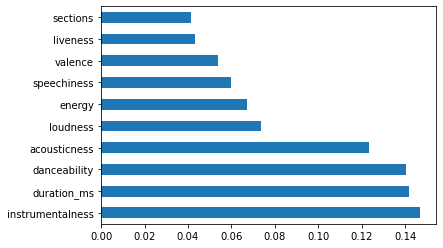

In [42]:
feature_imp.nlargest(10).plot(kind="barh")

In [43]:
best_feat = feature_imp.nlargest(8).index

In [44]:
best_feat

Index(['instrumentalness', 'duration_ms', 'danceability', 'acousticness',
       'loudness', 'energy', 'speechiness', 'valence'],
      dtype='object')

In [45]:
X_r = X[best_feat]

In [46]:
X_train_r, X_test_r, y_train, y_test = train_test_split(X_r,y, test_size=0.2, random_state=0)

In [47]:
scaler = preprocessing.StandardScaler()

X_train_stand_selected_r = scaler.fit_transform(X_train_r)
X_test_stand_selected_r = scaler.transform(X_test_r)

In [48]:
start = time.process_time()
model = RandomForestClassifier(n_estimators=700).fit(X_train_stand_selected_r,y_train)
print(time.process_time() - start)
preds = model.predict(X_test_stand_selected_r)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))
print(model.score(X_test_stand_selected_r,y_test))

4.671875
[[442 111]
 [ 81 470]]
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82       553
         1.0       0.81      0.85      0.83       551

    accuracy                           0.83      1104
   macro avg       0.83      0.83      0.83      1104
weighted avg       0.83      0.83      0.83      1104

0.8260869565217391


# Thanks to feature_importance which is a metric for Random Forest Classifier. We select top 8 features and get better result in a shorter time.

# Now we perform KNN algorithm

In [50]:
knn= KNeighborsClassifier(n_neighbors= 10)
knn.fit(X_train_stand,y_train)
knn.predict(X_test_stand)
knn.score(X_test_stand, y_test)

0.7907608695652174

# Now we make Cross Validation for the best neighbor size with standardized data

In [81]:
k_range = range(1, 200)

k_scores = []
k_parameter = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_stand, y_train, cv=10, scoring='accuracy') # It's 10 fold cross validation with 'accuracy' scoring
    k_scores.append(scores.mean())
    k_parameter.append(k)

# We find the best neighbor size as 11

In [82]:
df_knn= pd.DataFrame(k_scores, columns=['Validation Scores'])
df_knn.sort_values(by='Validation Scores', ascending=False)

,Validation Scores
11,0.817937
7,0.817029
15,0.816345
23,0.816122
17,0.815894
...,...
194,0.768338
196,0.768111
198,0.767432
0,0.764489


# Now we create KNN classifier with the optimum neighbor size

In [83]:
knn= KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_stand, y_train)
knn.predict(X_test_stand)
knn.score(X_test_stand, y_test)

0.7989130434782609

# Now we perform KNN to reduced data

In [84]:
knn= KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_stand_selected_r, y_train)
knn.predict(X_test_stand_selected_r)
knn.score(X_test_stand_selected_r, y_test)

0.8125

We reached 0.8125 accuracy score with reduced and scaled data

In [ ]:
kfoldCV_by_alpha=kfoldCV_by_alpha.sort_values(by=['Validation Accuracy'],ascending=False) ; kfoldCV_by_alpha